In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import random
import itertools
import numpy as np

In [4]:
tickers = [
    "AKBNK.IS", "ALARK.IS", "ALFAS.IS", "ARCLK.IS", "ASELS.IS", "ASTOR.IS", "BIMAS.IS",
    "BRSAN.IS", "CIMSA.IS", "CWENE.IS", "DOAS.IS", "DOHOL.IS", "EGEEN.IS", "EKGYO.IS",
    "ENJSA.IS", "ENKAI.IS", "EREGL.IS", "EUPWR.IS", "FROTO.IS", "GARAN.IS", "GESAN.IS",
    "GUBRF.IS", "HALKB.IS", "HEKTS.IS", "ISCTR.IS", "KCHOL.IS", "KONTR.IS", "KOZAA.IS",
    "KOZAL.IS", "KRDMD.IS", "MGROS.IS", "MIATK.IS", "ODAS.IS", "OYAKC.IS", "PETKM.IS",
    "PGSUS.IS", "SAHOL.IS", "SASA.IS", "SISE.IS", "SMRTG.IS", "TAVHL.IS", "TCELL.IS",
    "THYAO.IS", "TOASO.IS", "TTKOM.IS", "TUPRS.IS", "ULKER.IS", "VESTL.IS", "YKBNK.IS",
    "ZOREN.IS"
]

In [60]:
investment_data = []

for ticker in tickers:
    stock_data = yf.download(ticker, start="2023-07-01", end="2024-07-01")
    if not stock_data.empty:
        initial_price = stock_data['Adj Close'].iloc[0]
        final_price = stock_data['Adj Close'].iloc[-1]
        annual_return = ((final_price - initial_price) / initial_price) * 100
        investment_value = 100 * (final_price / initial_price)
        investment_data.append({
            "Ticker": ticker,
            "Initial Price": initial_price,
            "Final Price": final_price,
            "Annual Return (%)": annual_return,
            "Investment Value (100 TL)": investment_value
        })

investment_df = pd.DataFrame(investment_data)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

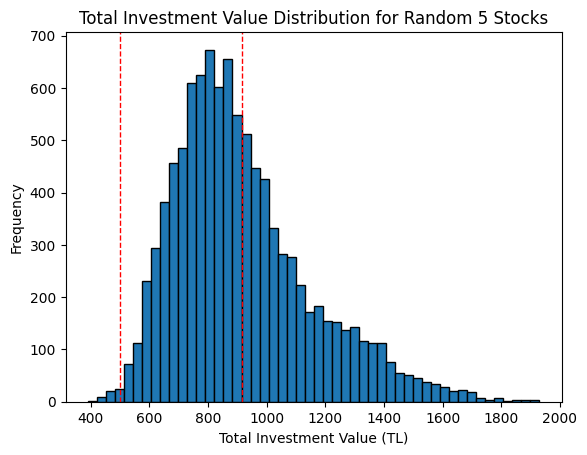

In [77]:
num_samples = 10000
results = []

for _ in range(num_samples):
    sample_tickers = random.sample(tickers, 5)
    sample_df = investment_df[investment_df['Ticker'].isin(sample_tickers)]
    total_investment = sample_df['Investment Value (100 TL)'].sum()
    results.append(total_investment)

# Histogram oluşturma
plt.hist(results, bins=50, edgecolor='black')
plt.axvline(x=500, color='r', linestyle='dashed', linewidth=1)
plt.title('Total Investment Value Distribution for Random 5 Stocks')
plt.xlabel('Total Investment Value (TL)')
plt.ylabel('Frequency')
plt.axvline(np.mean(results), color='r', linestyle='dashed', linewidth=1)
plt.show()